In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [269]:
#data = pd.read_csv('../data/nchs-births-and-general-fertility-rates-united-states.csv')
data = pd.read_csv('../data/birth_data.csv')
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['ids'] = np.arange(1, data.shape[0]+1)
data

,year,month,day,births,day_of_year,day_of_week,date,ids
0,1969,1,1,8486,1,3,1969-01-01,1
1,1969,1,2,9002,2,4,1969-01-02,2
2,1969,1,3,9542,3,5,1969-01-03,3
3,1969,1,4,8960,4,6,1969-01-04,4
4,1969,1,5,8390,5,7,1969-01-05,5
...,...,...,...,...,...,...,...,...
7300,1988,12,27,11528,362,2,1988-12-27,7301
7301,1988,12,28,11847,363,3,1988-12-28,7302
7302,1988,12,29,11704,364,4,1988-12-29,7303
7303,1988,12,30,11837,365,5,1988-12-30,7304


Text(0.5, 1.0, 'Births per year')

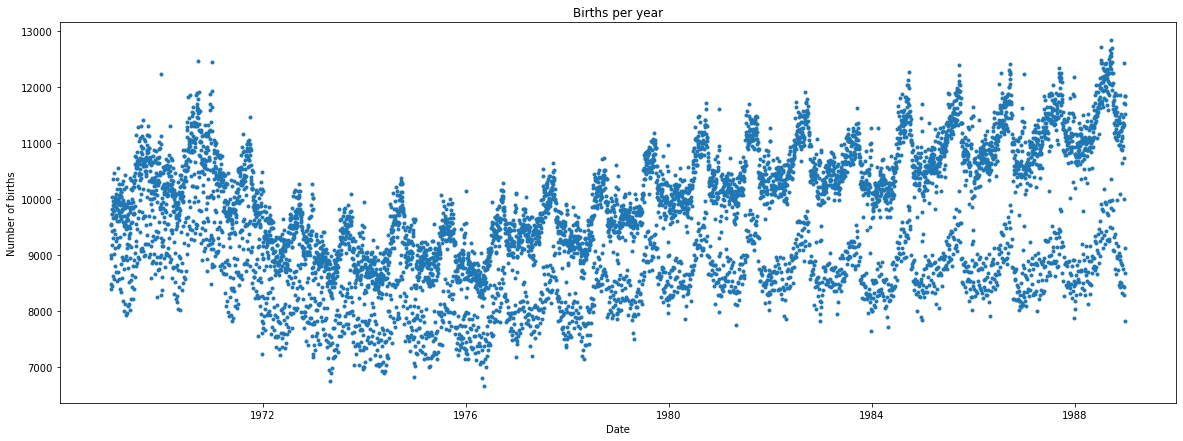

In [270]:
# data plot

plt.figure(figsize=(20,7))
plt.plot(data.date, data.births, '.')
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.title('Births per year')

Text(0.5, 1.0, 'Average number of births per day per year')

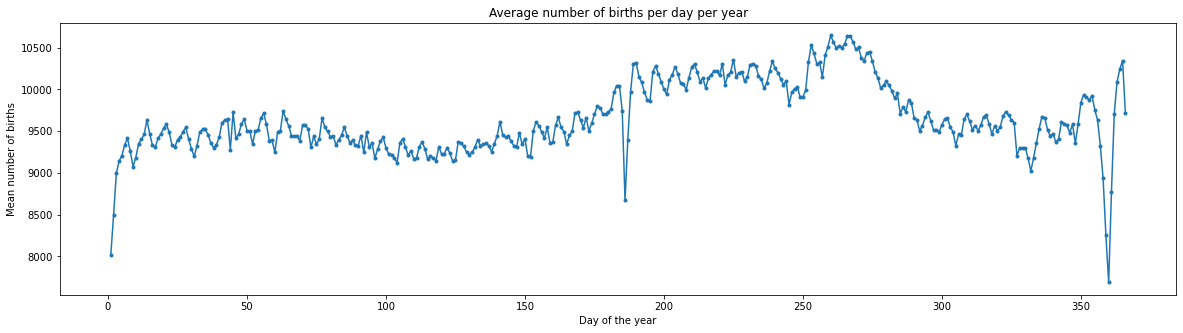

In [271]:
# avg births 

mean_day_per_yr = data.groupby(by='day_of_year').mean('births')

plt.figure(figsize=(20,5))
plt.plot(mean_day_per_yr.index, mean_day_per_yr.births, '.-')
plt.xlabel('Day of the year')
plt.ylabel('Mean number of births')
plt.title('Average number of births per day per year')

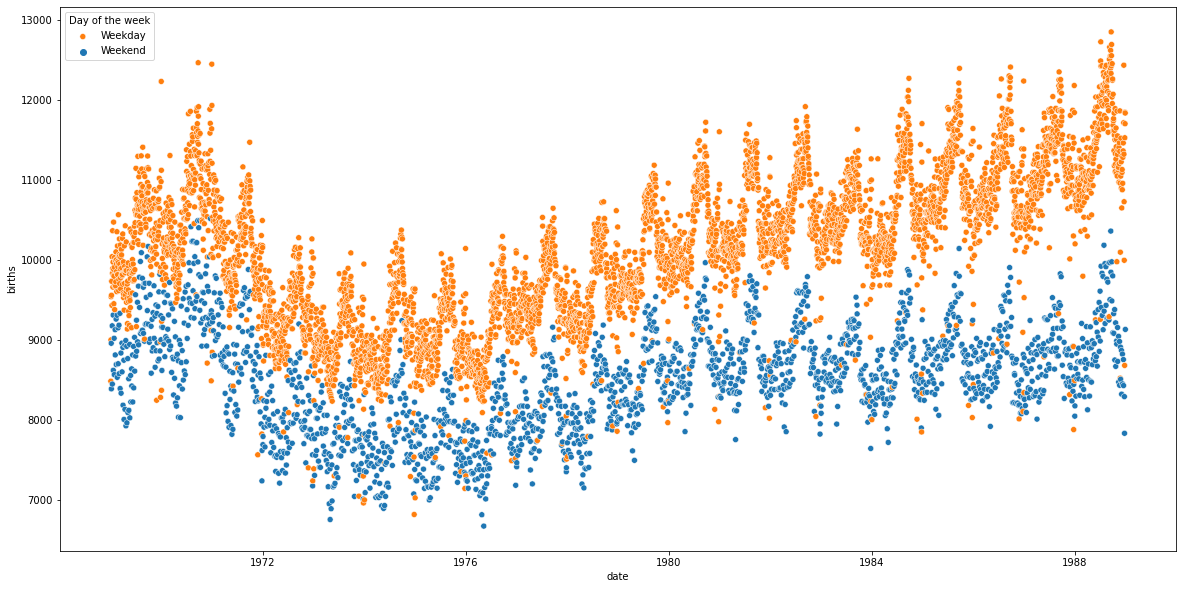

In [272]:
# weekday or weekend

data['weekday'] = data.day_of_week.apply(lambda x: 1 if x in [1,2,3,4,5] else 0)

plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='date', y='births', hue='weekday')
plt.legend(title='Day of the week', labels=['Weekday', 'Weekend'])

Text(0.5, 1.0, 'Relative births')

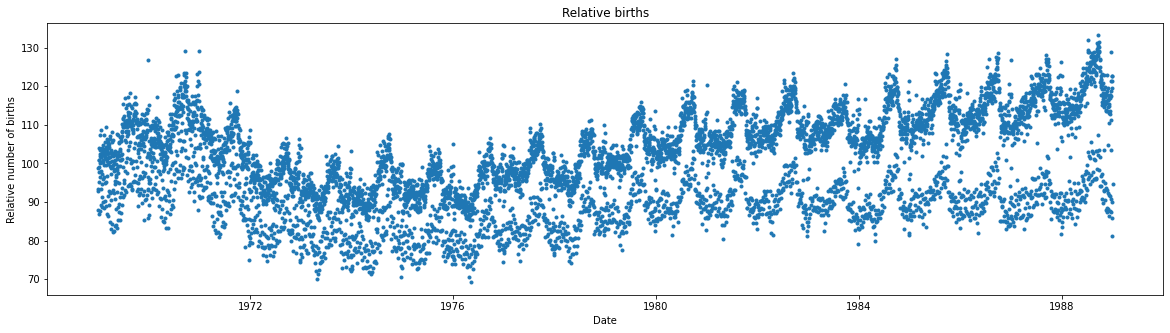

In [273]:
# births relative to 100

data['births_relative100'] = data.births.apply(lambda x: x/np.mean(data.births)*100)

plt.figure(figsize=(20,5))
plt.plot(data.date, data.births_relative100, '.')
plt.xlabel('Date')
plt.ylabel('Relative number of births')
plt.title('Relative births')

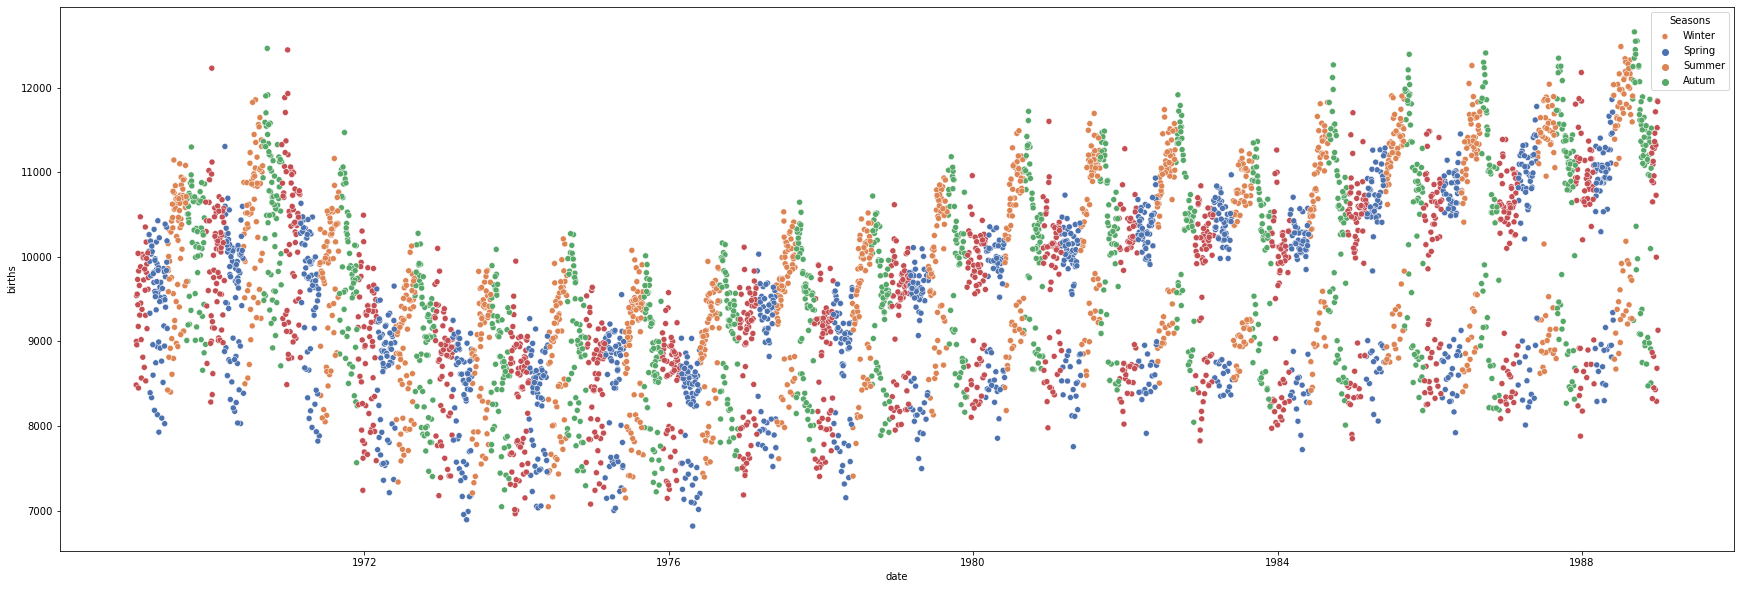

In [274]:
# all the data and seasons

def set_season(x):
    if x in [3,4,5]:
        return 1
    if x in [6,7,8]:
        return 2
    if x in [9,10,11]:
        return 3 
    else:
        return 4

data['seasons'] = data.month.apply(set_season)

plt.figure(figsize=(30,10))
sns.scatterplot(data=data.sample(frac=0.7), x='date', y='births', hue='seasons', palette="deep")
plt.legend(title='Seasons', labels=['Winter', 'Spring', 'Summer', 'Autum'])

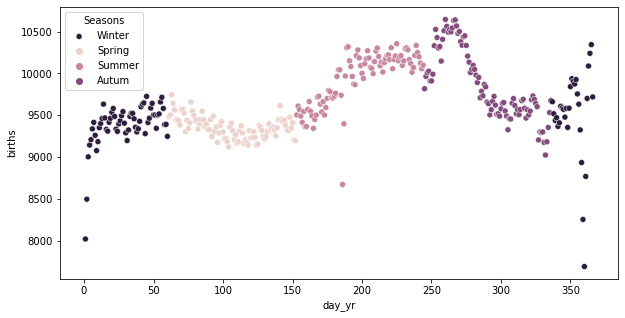

In [275]:
# avg births and seasons

mean_day_per_yr['seasons'] = mean_day_per_yr.month.apply(set_season)
mean_day_per_yr['day_yr'] = mean_day_per_yr.index

plt.figure(figsize=(10,5))
sns.scatterplot(data=mean_day_per_yr, x='day_yr', y='births', hue='seasons')
plt.legend(title='Seasons', labels=['Winter', 'Spring', 'Summer', 'Autum'])

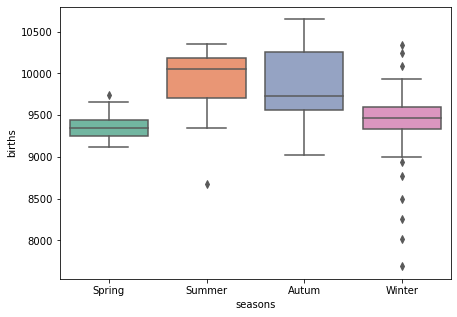

In [295]:
# season distribution on average

plt.figure(figsize=(7,5))
p = sns.boxplot(data=mean_day_per_yr, x='seasons', y='births', palette="Set2")
p.set(xticklabels=['Spring', 'Summer', 'Autum', 'Winter']);

<AxesSubplot:xlabel='year', ylabel='births'>

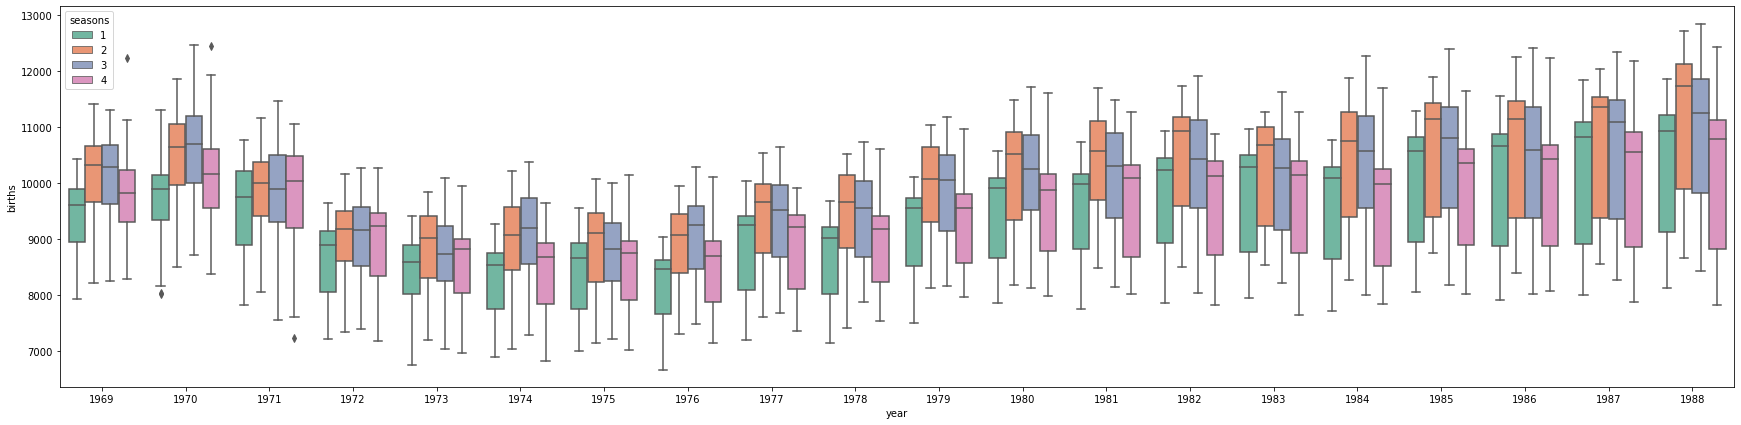

In [297]:
# season distribution per year

plt.figure(figsize=(30,7))
sns.boxplot(data=data, x='year', y='births', hue='seasons', palette="Set2")

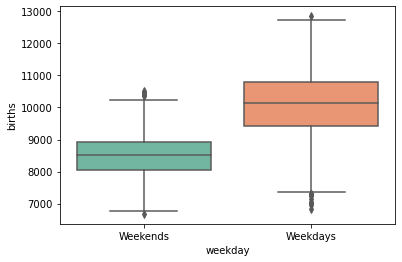

In [299]:
# histogram of weekdays and weekends

p1 = sns.boxplot(data=data, x='weekday', y='births', palette="Set2")
p1.set(xticklabels=['Weekends', 'Weekdays']);